### Decision Tree Classifier

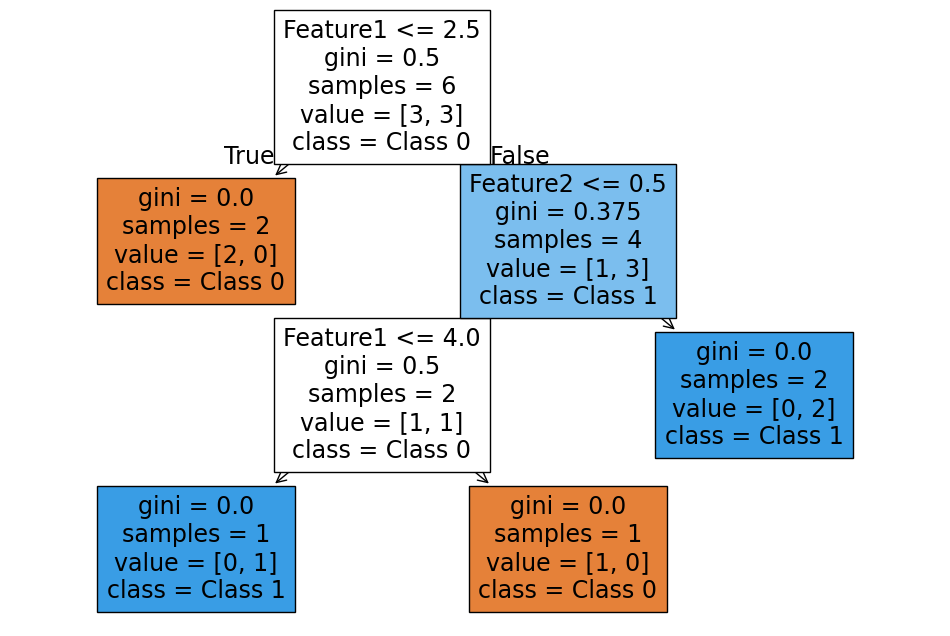

In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Create a small dummy dataset
data = {
    'Feature1': [1, 2, 3, 4, 5, 6],
    'Feature2': ['A', 'B', 'A', 'B', 'A', 'B'],
    'Label': [0, 0, 1, 1, 0, 1]
}
df = pd.DataFrame(data)

# Convert categorical feature to numerical
df['Feature2'] = df['Feature2'].astype('category').cat.codes

# Split the dataset into features and labels
X = df[['Feature1', 'Feature2']]
y = df['Label']

# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)

# Visualize the Decision Tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf, feature_names=['Feature1', 'Feature2'], class_names=['Class 0', 'Class 1'], filled=True)
plt.show()

### Decision Tree Regressor

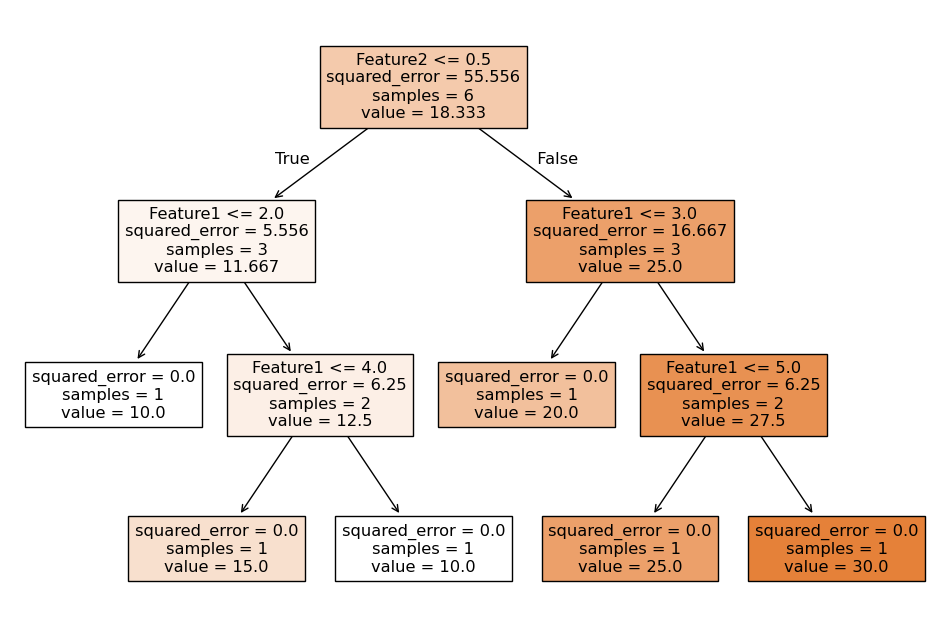

In [3]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt

# Create a small dummy dataset
data = {
    'Feature1': [1, 2, 3, 4, 5, 6],
    'Feature2': ['A', 'B', 'A', 'B', 'A', 'B'],
    'Label': [10, 20, 15, 25, 10, 30]
}
df = pd.DataFrame(data)

# Convert categorical feature to numerical
df['Feature2'] = df['Feature2'].astype('category').cat.codes

# Split the dataset into features and labels
X = df[['Feature1', 'Feature2']]
y = df['Label']

# Initialize and train the Decision Tree Regressor
reg = DecisionTreeRegressor()
reg = reg.fit(X, y)

# Visualize the Decision Tree
plt.figure(figsize=(12,8))
tree.plot_tree(reg, feature_names=['Feature1', 'Feature2'], filled=True)
plt.show()


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


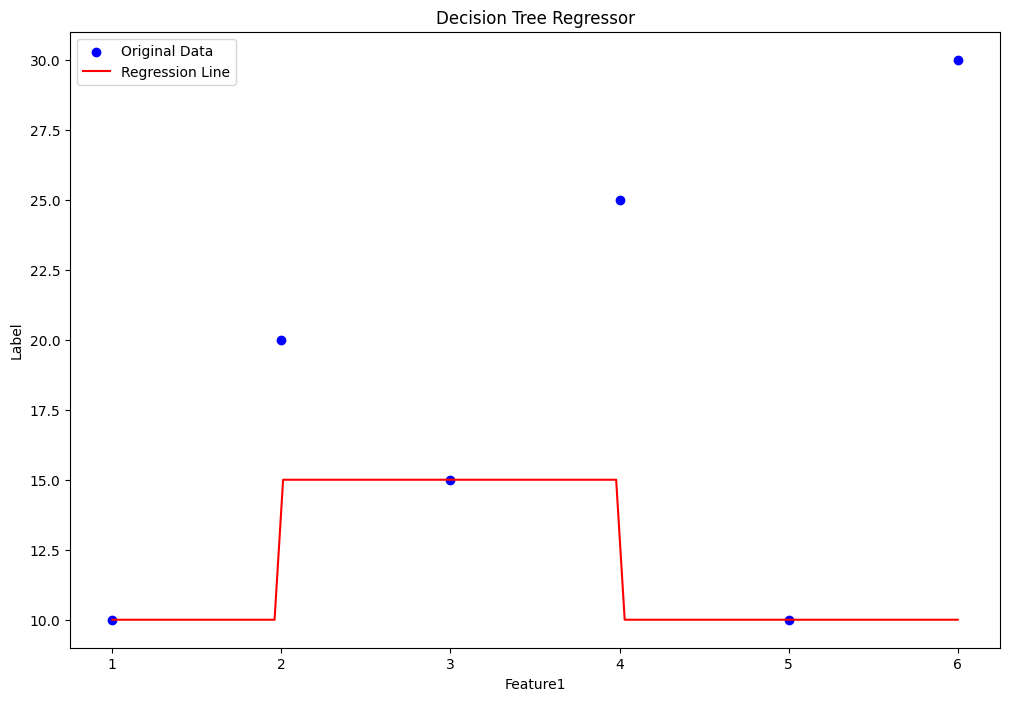

In [4]:
# Visualize the regression line by Decision Tree Regressor

# Generate a range of values for Feature1
X_test = np.linspace(df['Feature1'].min(), df['Feature1'].max(), 100).reshape(-1, 1)
X_test = np.hstack((X_test, np.zeros_like(X_test)))  # Add a column of zeros for Feature2

# Predict the labels for the generated values
y_pred = reg.predict(X_test)

# Plot the original data points
plt.figure(figsize=(12, 8))
plt.scatter(df['Feature1'], y, color='blue', label='Original Data')

# Plot the regression line
plt.plot(X_test[:, 0], y_pred, color='red', label='Regression Line')
plt.xlabel('Feature1')
plt.ylabel('Label')
plt.title('Decision Tree Regressor')
plt.legend()
plt.show()


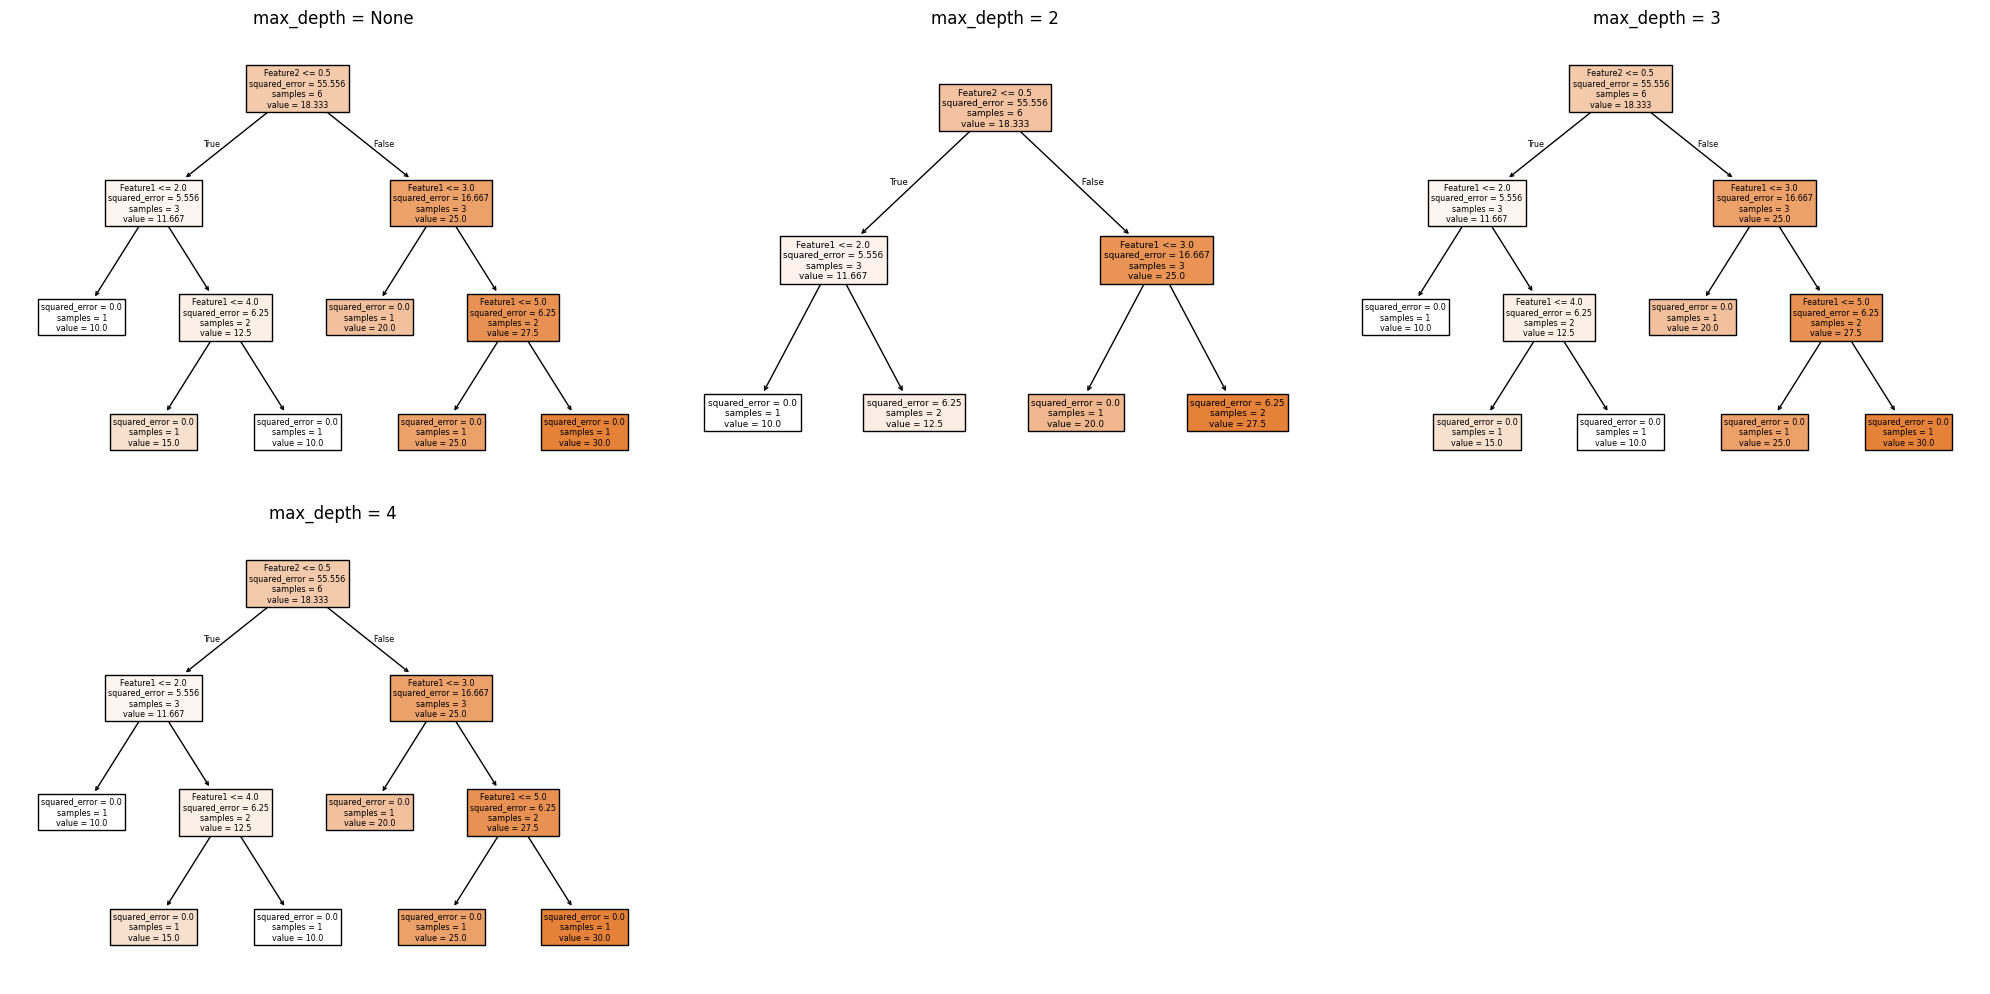

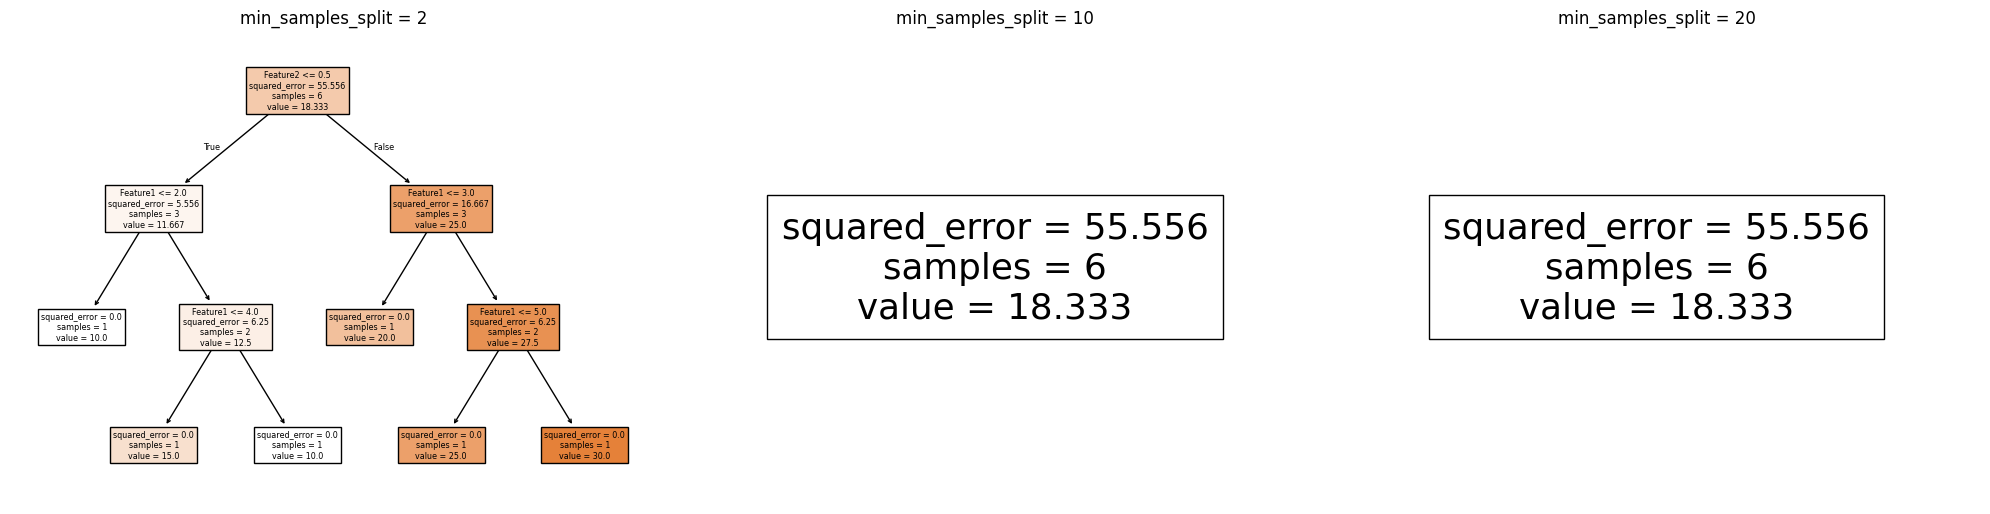

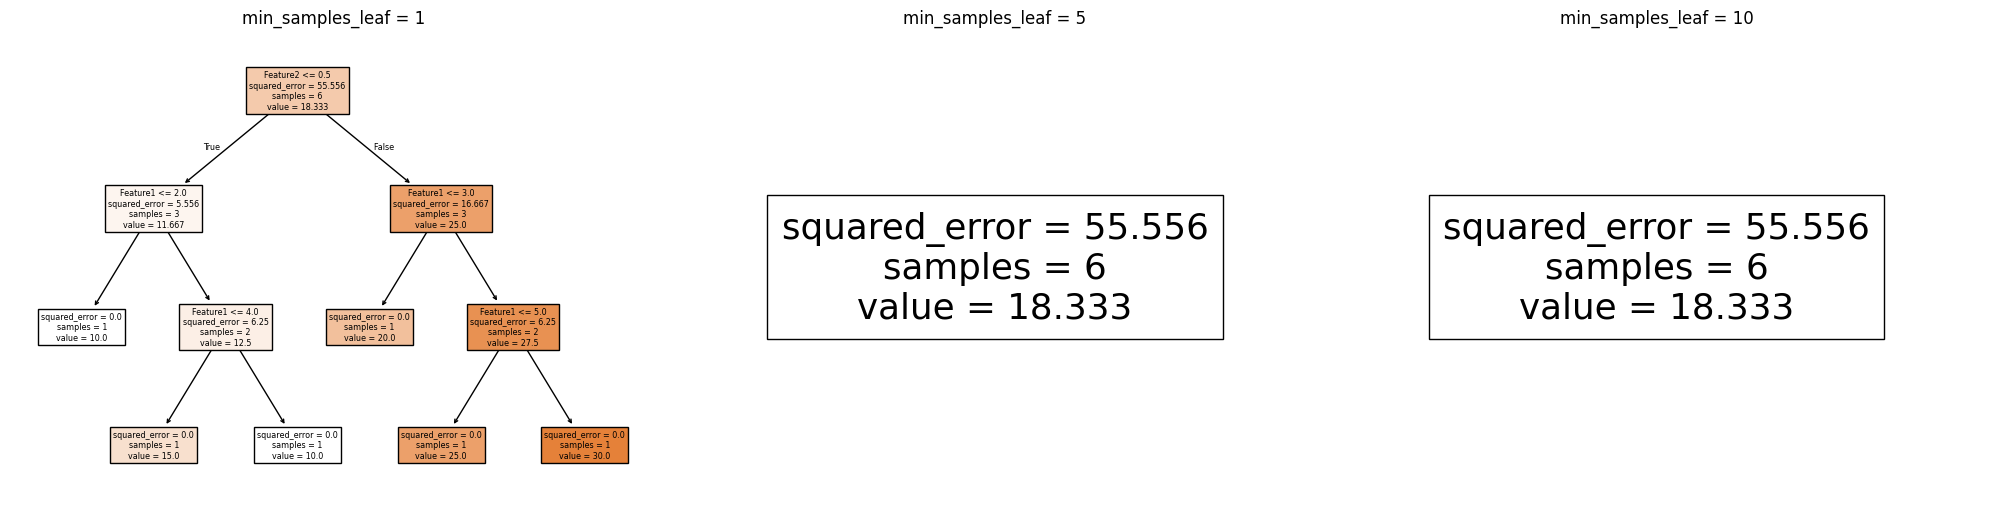

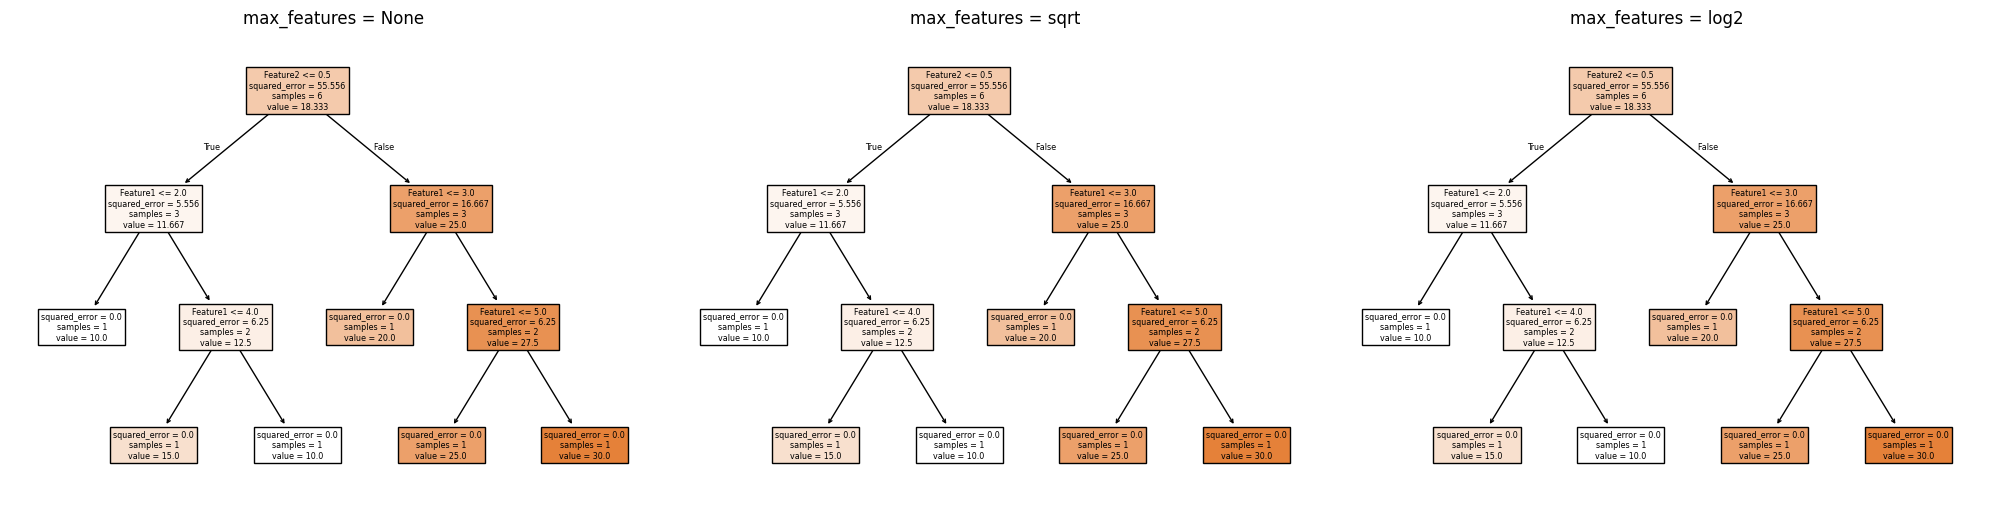

In [8]:
# Understanding pre-pruning hyperparameters of Decision Tree Regressor

# List of pre-pruning hyperparameters to explore
prepruning_params = {
    'max_depth': [None, 2,3,4],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

# Function to visualize the effect of pre-pruning hyperparameters
def visualize_prepruning_effect(param_name, param_values):
    plt.figure(figsize=(20, 15))
    for i, value in enumerate(param_values):
        reg = DecisionTreeRegressor(**{param_name: value})
        reg.fit(X, y)
        plt.subplot(3, 3, i + 1)
        tree.plot_tree(reg, feature_names=['Feature1', 'Feature2'], filled=True)
        plt.title(f'{param_name} = {value}')
    plt.tight_layout()
    plt.show()

# Visualize the effect of each pre-pruning hyperparameter
for param_name, param_values in prepruning_params.items():
    visualize_prepruning_effect(param_name, param_values)



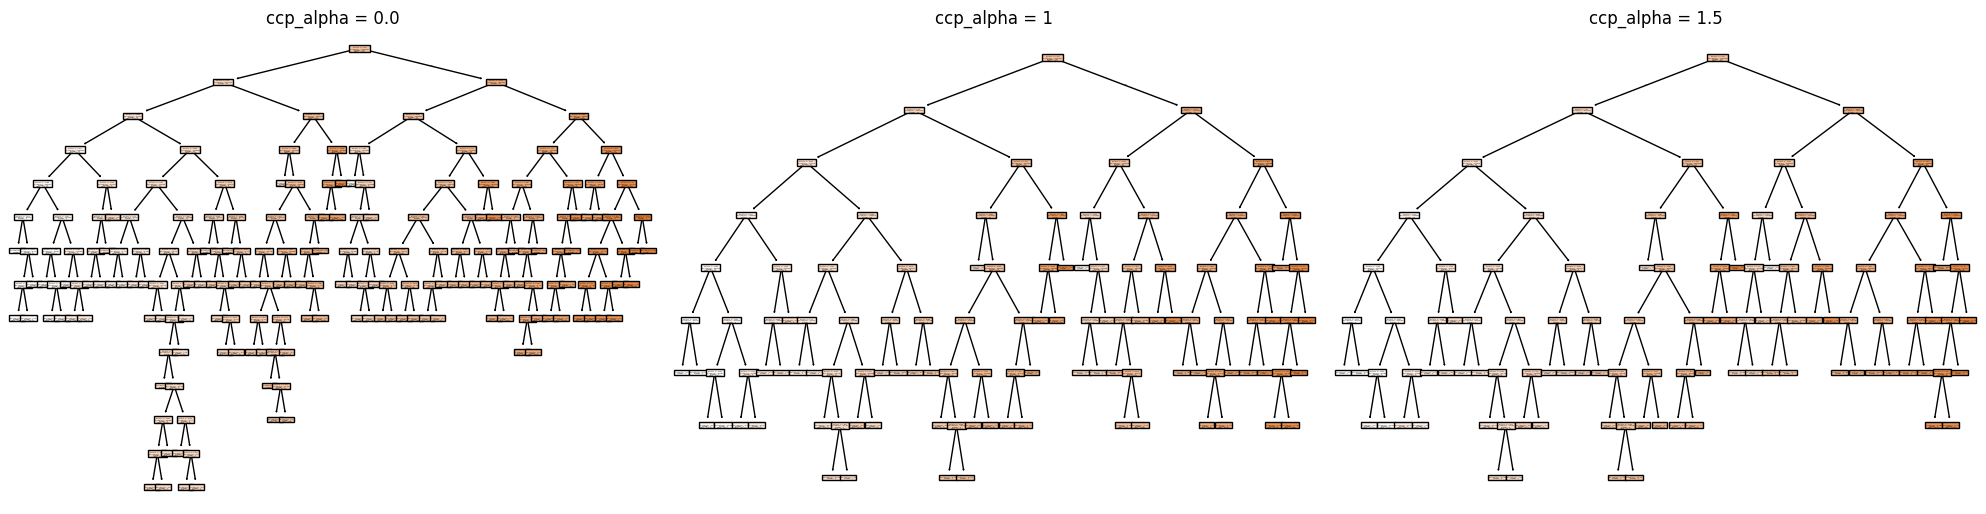

In [13]:
from sklearn.datasets import make_regression

# Generate a dummy dataset
X_dummy, y_dummy = make_regression(n_samples=100, n_features=2, noise=0.1, random_state=42)

# Function to visualize the effect of post-pruning using cost complexity pruning
def visualize_postpruning_effect(ccp_alpha_values):
    plt.figure(figsize=(20, 15))
    for i, ccp_alpha in enumerate(ccp_alpha_values):
        reg = DecisionTreeRegressor(ccp_alpha=ccp_alpha)
        reg.fit(X_dummy, y_dummy)
        plt.subplot(3, 3, i + 1)
        tree.plot_tree(reg, feature_names=['Feature1', 'Feature2'], filled=True)
        plt.title(f'ccp_alpha = {ccp_alpha}')
    plt.tight_layout()
    plt.show()

# List of ccp_alpha values to explore for post-pruning
ccp_alpha_values = [0.0,1,1.5]

# Visualize the effect of post-pruning
visualize_postpruning_effect(ccp_alpha_values)


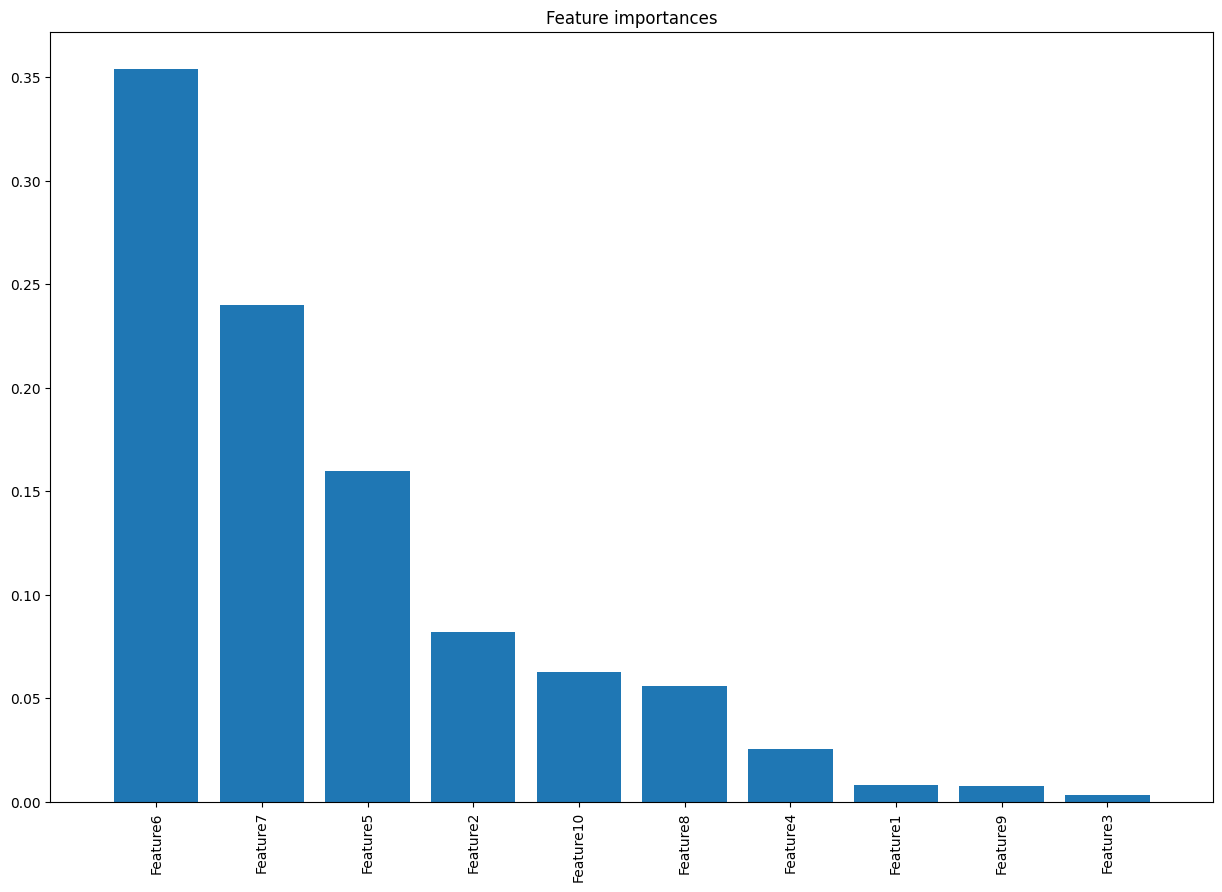

In [15]:
# Function to calculate and plot feature importances
def plot_feature_importances(model, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(15, 10))
    plt.title("Feature importances")
    plt.bar(range(len(importances)), importances[indices], align="center")
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
    plt.xlim([-1, len(importances)])
    plt.show()

# Generate a dummy dataset with many features
X_dummy, y_dummy = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)

# Train a decision tree regressor
reg = DecisionTreeRegressor()
reg.fit(X_dummy, y_dummy)

# Plot feature importances
plot_feature_importances(reg, [f'Feature{i+1}' for i in range(X_dummy.shape[1])])
